<a href="https://www.kaggle.com/code/enejanh/dl-ml-models-for-my-youtube-channel-watching-hours?scriptVersionId=208989357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Libraries 

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import datetime as dt



import warnings

warnings.filterwarnings("ignore")

warnings.warn("this will not show")



plt.rcParams["figure.figsize"] = (10,6)



sns.set_style("whitegrid")

pd.set_option('display.float_format', lambda x: '%.3f' % x)



# Set it None to display all rows in the dataframe

# pd.set_option('display.max_rows', None)



# Set it to None to display all columns in the dataframe

pd.set_option('display.max_columns', None)

In [2]:
df1 = pd.read_csv("/kaggle/input/my-youtube-data/2021.csv")

In [3]:
df2 = pd.read_csv("/kaggle/input/my-youtube-data/2022.csv")

In [4]:
df3 = pd.read_csv("/kaggle/input/my-youtube-data/2023.csv")

In [5]:
df4 = pd.read_csv("/kaggle/input/my-youtube-data/2024.csv")

In [6]:
df5 = pd.read_csv("/kaggle/input/my-youtube-data/2024.0.csv")

In [7]:
df6 = pd.read_csv("/kaggle/input/my-youtube-data/last.csv")

In [8]:
merged_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)


In [9]:
df = merged_df

In [10]:
df.shape

(2236, 4)

In [11]:
df.head()

,Date,Views,Watch time (hours),Average view duration
0,Total,30375.000,1334.810,0:02:38
1,2021-01-01,34.000,2.152,0:03:47
2,2020-12-31,13.000,0.475,0:02:11
3,2020-12-30,47.000,2.580,0:03:17
4,2020-12-29,78.000,3.535,0:02:43


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2236 non-null   object 
 1   Views                  2235 non-null   float64
 2   Watch time (hours)     2235 non-null   float64
 3   Average view duration  2234 non-null   object 
dtypes: float64(2), object(2)
memory usage: 70.0+ KB


In [13]:
df.isnull().sum()

Date                     0
Views                    1
Watch time (hours)       1
Average view duration    2
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df = df.drop(index=0)

In [16]:
df.head()

,Date,Views,Watch time (hours),Average view duration
1,2021-01-01,34.000,2.152,0:03:47
2,2020-12-31,13.000,0.475,0:02:11
3,2020-12-30,47.000,2.580,0:03:17
4,2020-12-29,78.000,3.535,0:02:43
5,2020-12-28,158.000,7.245,0:02:45


Eğer parse_dates=['timestamp'] argümanını kullanmazsak ve sadece df = pd.read_csv("store_sharing.csv") şeklinde bir kod çalıştırırsak, "timestamp" sütunu varsayılan olarak string olarak okunur ve sıradan bir sütun olarak işlenir:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 1 to 2235
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2233 non-null   object 
 1   Views                  2233 non-null   float64
 2   Watch time (hours)     2233 non-null   float64
 3   Average view duration  2233 non-null   object 
dtypes: float64(2), object(2)
memory usage: 87.2+ KB


In [18]:
# 'Date' sütununda "Total" değerine sahip satırları bulmak

total_rows = df[df['Date'] == 'Total']

print(total_rows)  # "Total" olan satırları görmek için

       Date     Views  Watch time (hours) Average view duration
319   Total 20463.000            1108.698               0:03:15
686   Total 10591.000             529.482               0:02:59
1053  Total  4883.000             229.714               0:02:49
1413  Total 13815.000             685.127               0:02:58
1915  Total  9661.000             495.768               0:03:04


In [19]:
# "Total" olan satırları DataFrame'den kaldırmak

df = df[df['Date'] != 'Total']

In [20]:
# 'date' sütununu datetime formatına çevirme

df['Date'] = pd.to_datetime(df['Date'])

df.drop('Average view duration', axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 1 to 2235
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2228 non-null   datetime64[ns]
 1   Views               2228 non-null   float64       
 2   Watch time (hours)  2228 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 69.6 KB


In [22]:
df = df.sort_values(by='Date', ascending=True)

In [23]:
df.to_csv("my_data.csv", index=False) 

In [24]:
df = pd.read_csv("my_data.csv", parse_dates=['Date'], index_col="Date")

In [25]:
df

,Views,Watch time (hours)
Date,,
2020-02-18,16.000,0.240
2020-02-19,6.000,0.033
2020-02-21,5.000,0.000
2020-02-22,17.000,0.211
2020-02-23,15.000,0.186
...,...,...
2024-11-11,50.000,1.988
2024-11-12,66.000,1.963
2024-11-13,54.000,2.730


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2228 entries, 2020-02-18 to 2024-11-15
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Views               2228 non-null   float64
 1   Watch time (hours)  2228 non-null   float64
dtypes: float64(2)
memory usage: 52.2 KB


##  Exploratory Data Analysis



- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.

- You can check missing values and outliers.

- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [27]:
df.isnull().sum()

Views                 0
Watch time (hours)    0
dtype: int64

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Views,2228.000,39.369,40.301,1.000,14.000,27.000,51.000,408.000
Watch time (hours),2228.000,1.921,1.964,0.000,0.530,1.239,2.718,13.449


Deep Learning de Outlier ların, Machine Learning de olduğu kadar önemi bulunmamaktadır!

### Plot Breakdowns of Data

In [29]:
df["year"] = df.index.year

df['month'] = df.index.month 

df['day'] = df.index.day

df['dayofweek'] = df.index.dayofweek

df['hour'] = df.index.hour 

df["date"] = df.index.date

In [30]:
df.sample(7)

,Views,Watch time (hours),year,month,day,dayofweek,hour,date
Date,,,,,,,,
2024-02-04,21.000,0.932,2024,2,4,6,0,2024-02-04
2021-09-05,54.000,2.696,2021,9,5,6,0,2021-09-05
2022-06-18,52.000,3.005,2022,6,18,5,0,2022-06-18
2021-12-19,66.000,2.504,2021,12,19,6,0,2021-12-19
2024-01-21,67.000,1.742,2024,1,21,6,0,2024-01-21
2023-09-26,11.000,0.046,2023,9,26,1,0,2023-09-26
2020-12-03,59.000,3.283,2020,12,3,3,0,2020-12-03


***i. Plot watching hours shares over time***

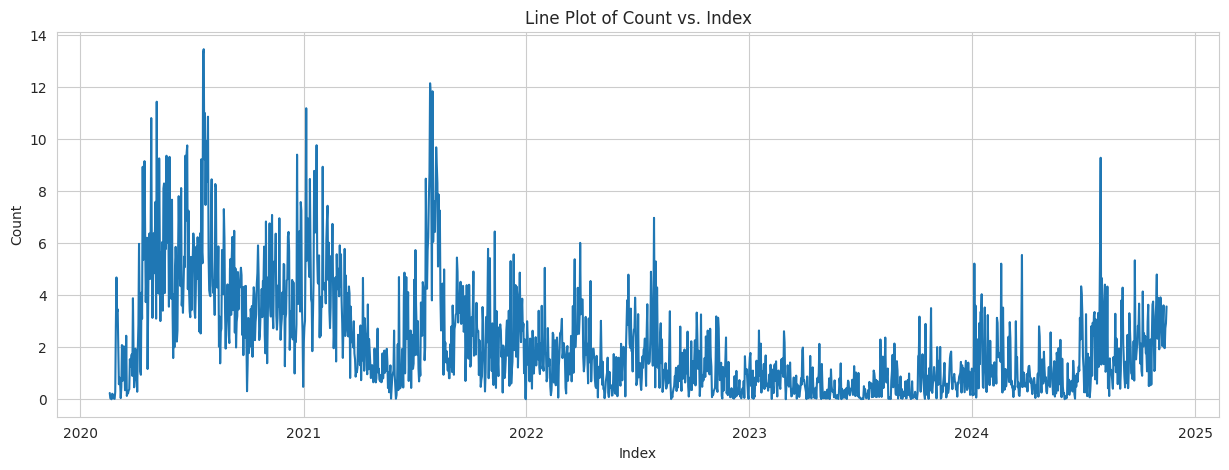

In [31]:
plt.figure(figsize=(15, 5))  # Set the figure size

sns.lineplot(x=df.index, y="Watch time (hours)", data=df)  # Plot using Seaborn's lineplot function



plt.xlabel("Index")  # Set the x-axis label

plt.ylabel("Count")  # Set the y-axis label

plt.title("Line Plot of Count vs. Index")  # Set the plot title

plt.show()  # Display the plot

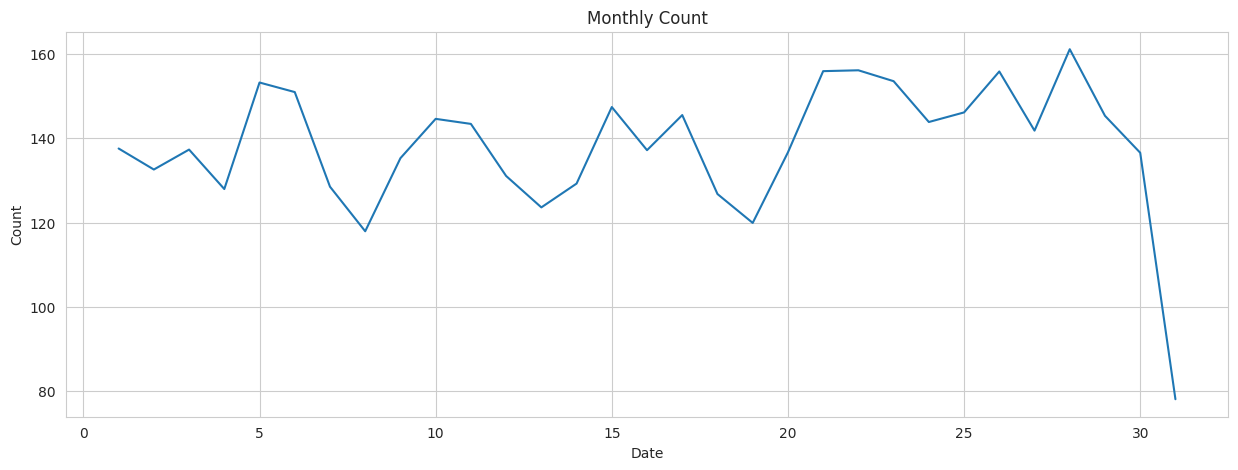

In [32]:
date_cnt = df.groupby("day")["Watch time (hours)"].sum()   # Görseli sadeleştirmek için groupby ile günlük kullanımı



plt.figure(figsize=(15, 5))

sns.lineplot(x=date_cnt.index, y=date_cnt.values)



plt.xlabel("Date")

plt.ylabel("Count")

plt.title("Monthly Count")

plt.show()

***ii. Plot watching hours by months***

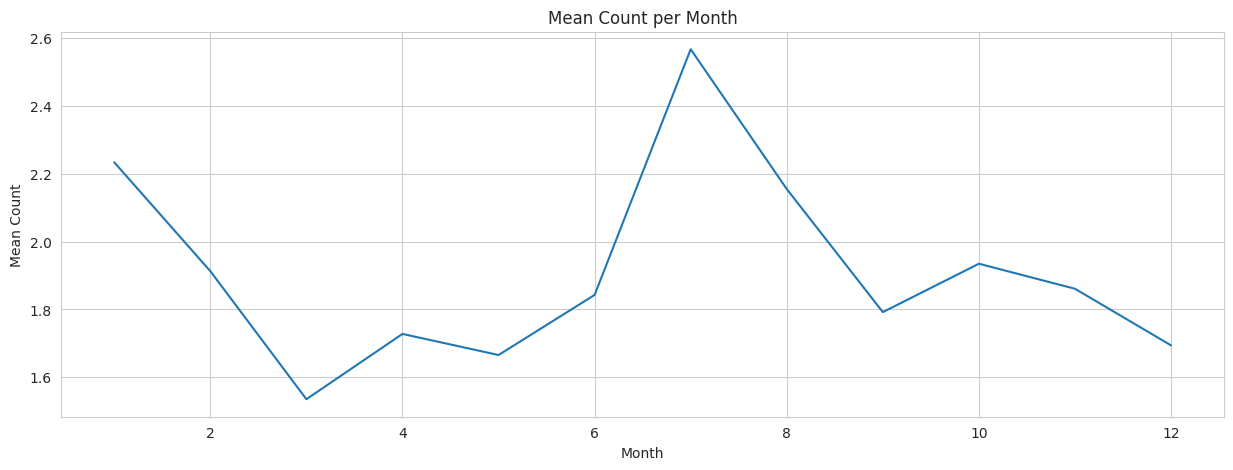

In [33]:
month_cnt = df.groupby("month")["Watch time (hours)"].mean()



plt.figure(figsize=(15, 5))

sns.lineplot(x=month_cnt.index, y=month_cnt.values)



plt.xlabel("Month")

plt.ylabel("Mean Count")

plt.title("Mean Count per Month")



plt.show()

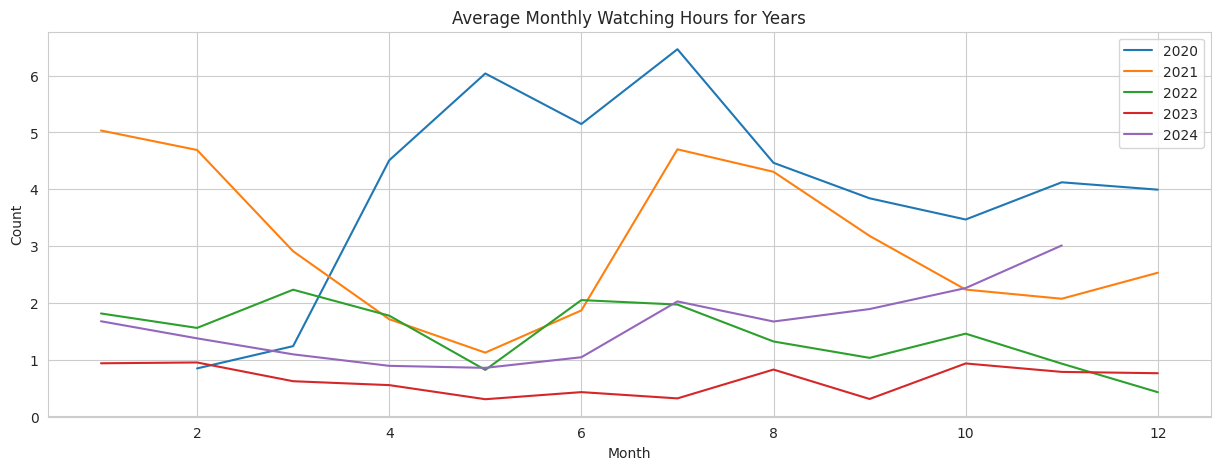

In [34]:
year_month_cnt = df.groupby(["year", "month"])["Watch time (hours)"].mean()    

plt.figure(figsize=(15,5))        
for year in year_month_cnt.index.levels[0]:

    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)



plt.legend()

plt.xlabel('Month')

plt.ylabel('Count')

plt.title('Average Monthly Watching Hours for Years')

plt.show()

***iii. Plot watching hours by Days Of The Week Of Years***

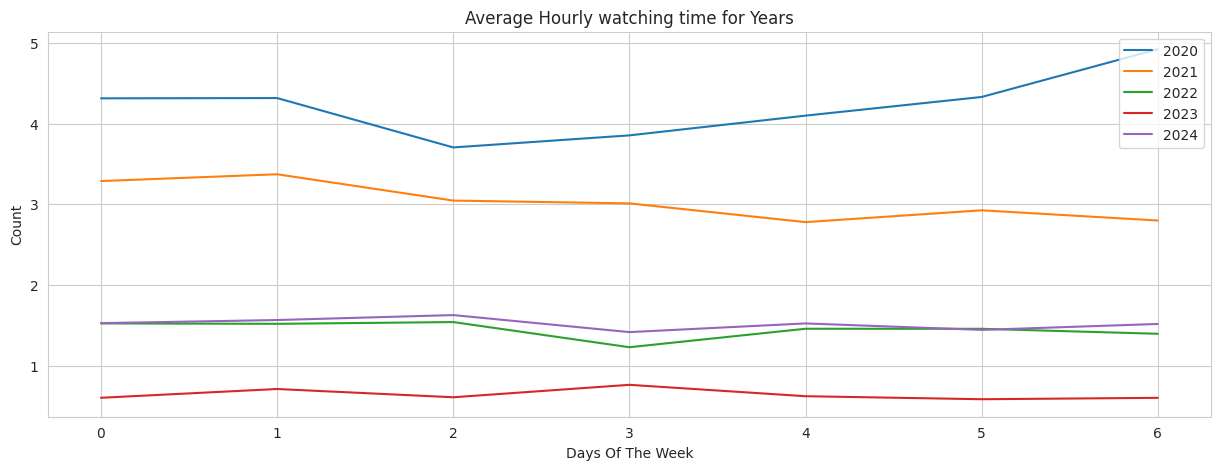

In [35]:
year_hour_cnt = df.groupby(["year", "dayofweek"])["Watch time (hours)"].mean()



plt.figure(figsize=(15,5))

for year in year_month_cnt.index.levels[0]:

    plt.plot(year_hour_cnt[year].index, year_hour_cnt[year],label=year)



plt.legend()

plt.xlabel('Days Of The Week')

plt.ylabel('Count')

plt.title('Average Hourly watching time for Years')

plt.show()

***iv. Plot watching hours by day of week***


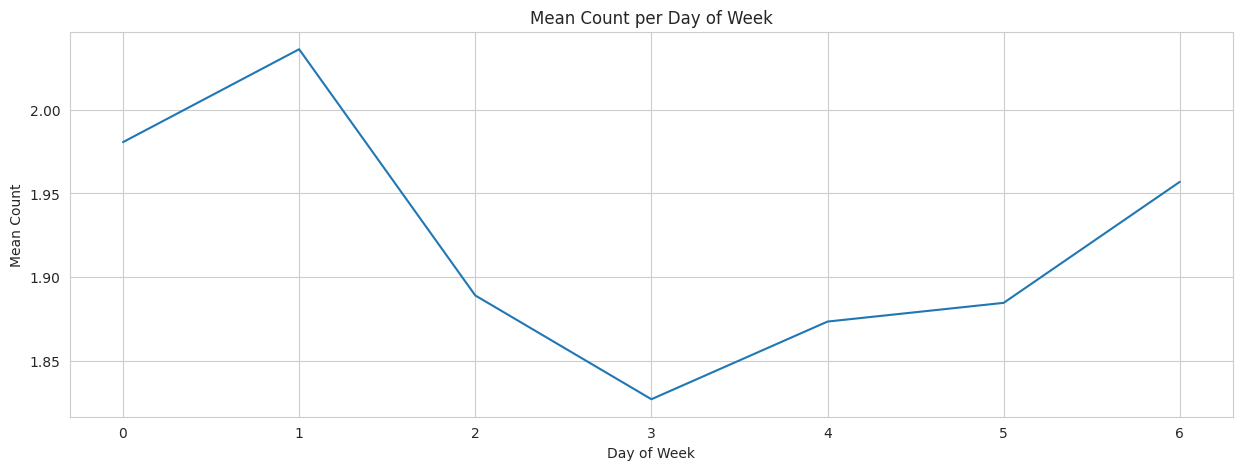

In [36]:
weekday_cnt = df.groupby("dayofweek")["Watch time (hours)"].mean()



plt.figure(figsize=(15, 5))

sns.lineplot(x=weekday_cnt.index, y=weekday_cnt.values)



plt.xlabel("Day of Week")

plt.ylabel("Mean Count")

plt.title("Mean Count per Day of Week")



plt.show()

### Drop unnecessary columns



- Check correlations via heatmap

- Think about time-based features and decide dropping which is unnecessary for the model

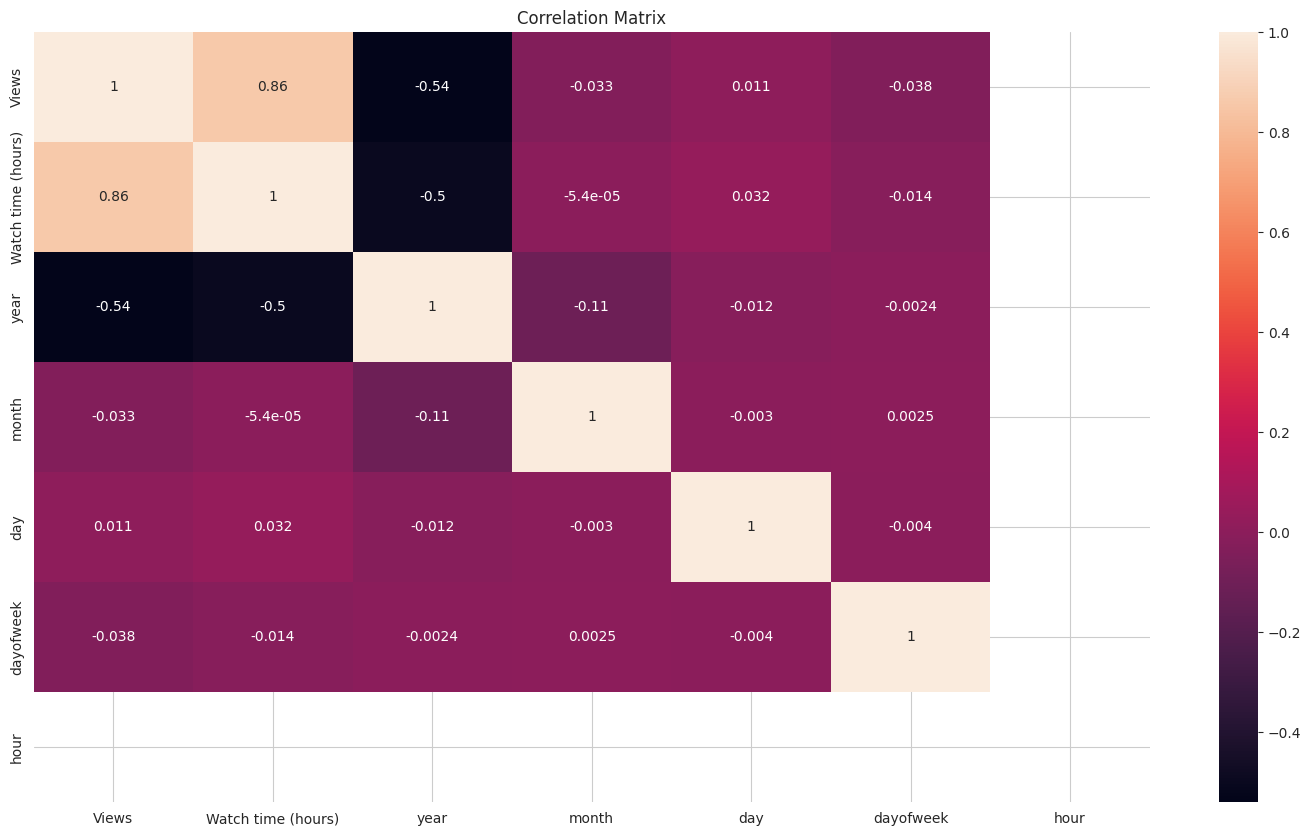

In [37]:
numerical_df = df.select_dtypes(include=[np.number])



# Korelasyon matrisini oluşturalım

correlation_matrix = numerical_df.corr()



# Korelasyon matrisini görselleştirelim

plt.figure(figsize=(18,10))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')

plt.show()


In [38]:
df.head()

,Views,Watch time (hours),year,month,day,dayofweek,hour,date
Date,,,,,,,,
2020-02-18,16.000,0.240,2020,2,18,1,0,2020-02-18
2020-02-19,6.000,0.033,2020,2,19,2,0,2020-02-19
2020-02-21,5.000,0.000,2020,2,21,4,0,2020-02-21
2020-02-22,17.000,0.211,2020,2,22,5,0,2020-02-22
2020-02-23,15.000,0.186,2020,2,23,6,0,2020-02-23


##  Data Pre-Processing

### Train - Test Split



Appropriately split the data for optimum training.

In [39]:
df.shape

(2228, 8)

In [40]:
df = df[["Watch time (hours)", 'Views']]

In [41]:
train_size = int(len(df) * 0.9)

test_size = len(df) - train_size



train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(len(train), len(test))

2005 223


In [42]:
train.shape

(2005, 2)

In [43]:
test.shape

(223, 2)

### Scaling

**Robust Scaling**



It is common to scale data prior to fitting a machine learning model.



This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.



If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.



LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.


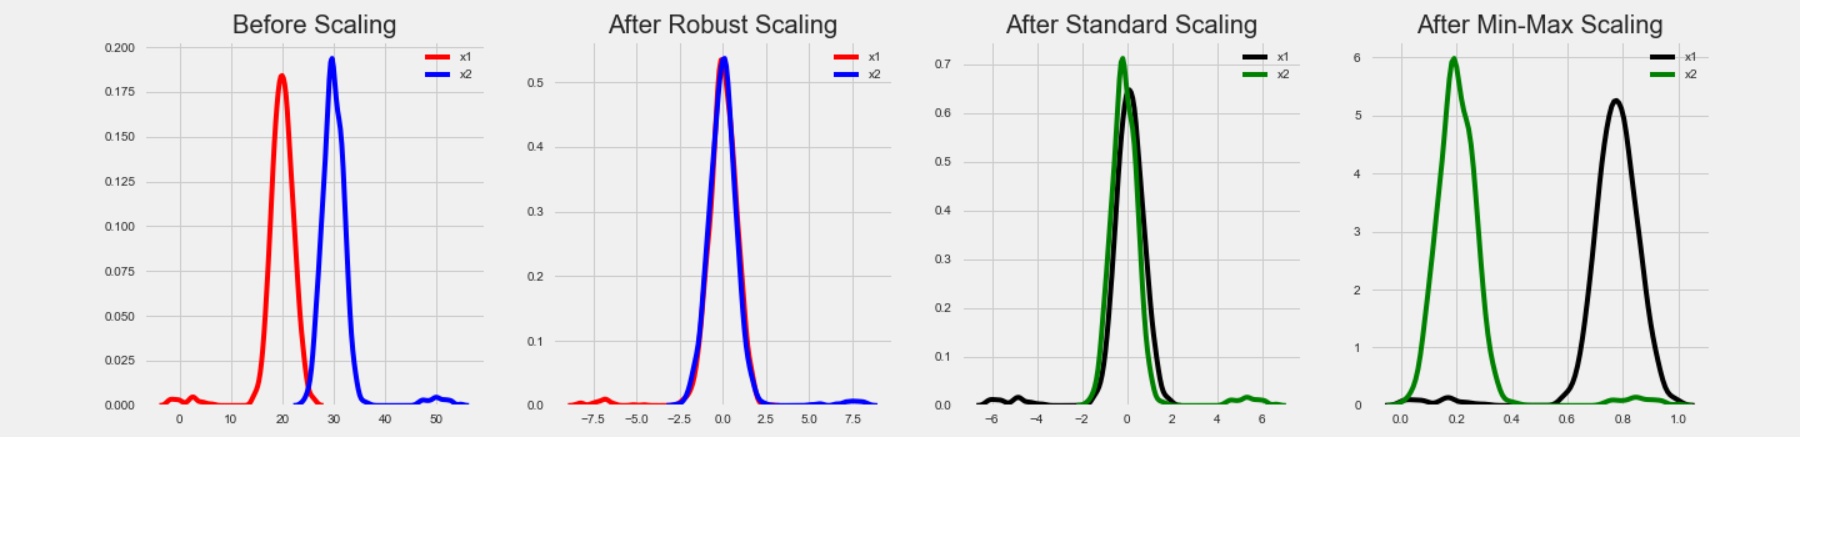

In [44]:
from sklearn.preprocessing import RobustScaler

In [45]:
df.columns

Index(['Watch time (hours)', 'Views'], dtype='object')

In [46]:
df.head(2)

,Watch time (hours),Views
Date,,
2020-02-18,0.240,16.000
2020-02-19,0.033,6.000


In [47]:
f_columns = ['Views']



f_transformer = RobustScaler()   

target_transformer = RobustScaler()   



train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])

train['Watch time (hours)'] = target_transformer.fit_transform(train[['Watch time (hours)']])



test.loc[:, f_columns] = f_transformer.transform(test[f_columns])


test['Watch time (hours)'] = target_transformer.transform(test[['Watch time (hours)']])

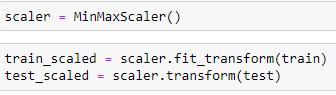

### Define a Function for Creating Time Steps 



In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.

You must separate the lines ordered by time in decimal steps.

The size of the step may vary depending on the situation, in this case it is set to 10.



Therefore, train and test data should be divided into groups of ten.

When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.



As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.

So, your data set must be a 3-dimensional numpy array like (15662, 10,13).

As a result, LSTM will learn by taking 10 rows into account for one row.



Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.



After defining the function, apply it to train and test sets.

In [48]:
train

,Watch time (hours),Views
Date,,
2020-02-18,-0.422,-0.231
2020-02-19,-0.516,-0.487
2020-02-21,-0.531,-0.513
2020-02-22,-0.435,-0.205
2020-02-23,-0.446,-0.256
...,...,...
2024-07-18,0.585,0.692
2024-07-18,0.585,0.692
2024-07-19,0.941,0.282


In [49]:
def create_dataset(X, y, time_steps=1):  # buraya X ve y train i vereceğiz.

   

    Xs, ys = [], []   # 2 tane boş liste oluşturuyor ve bunlara X ve y train leri atayacağız. 

    for i in range(len(X) - time_steps):      # length i ne ise oraya kadar gidecek.

        v = X.iloc[i:(i + time_steps)].values # her döngüde bana verdiğim train data sını O İLE 1 arasını value yani data frame olarak al

        Xs.append(v)                          # bu değeri ilk listenin içine at. paketler halinde atacak.. 0.24, 1-25 etc..

        ys.append(y.iloc[i + time_steps])   # bu sefer i (0) + 23 (indes) yani 24 nci datayı y ye koy

    return np.array(Xs), np.array(ys)  # daha sonra bunları array e çevir..

In [50]:
time_steps = 20  



X_train, y_train = create_dataset(train, train["Watch time (hours)"], time_steps)

X_test, y_test = create_dataset(test, test["Watch time (hours)"], time_steps)



print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)



# reshape to [samples, time_steps, n_features]

(1985, 20, 2) (1985,)
(203, 20, 2) (203,)


In [51]:
X_train

array([[[-0.4218821 , -0.23076923],
        [-0.51598692, -0.48717949],
        [-0.53065674, -0.51282051],
        ...,
        [-0.32073758, -0.25641026],
        [ 0.41475157,  2.87179487],
        [-0.21114543,  0.15384615]],

       [[-0.51598692, -0.48717949],
        [-0.53065674, -0.51282051],
        [-0.43509856, -0.20512821],
        ...,
        [ 0.41475157,  2.87179487],
        [-0.21114543,  0.15384615],
        [-0.17272232, -0.05128205]],

       [[-0.53065674, -0.51282051],
        [-0.43509856, -0.20512821],
        [-0.44608956, -0.25641026],
        ...,
        [-0.21114543,  0.15384615],
        [-0.17272232, -0.05128205],
        [ 0.39349623,  2.87179487]],

       ...,

       [[ 0.2630575 , -0.02564103],
        [ 0.2630575 , -0.02564103],
        [ 0.02252702, -0.28205128],
        ...,
        [ 0.80416023,  0.48717949],
        [ 0.58497593,  0.69230769],
        [ 0.58497593,  0.69230769]],

       [[ 0.2630575 , -0.02564103],
        [ 0.02252702, -0.28

In [52]:
X_train[0]

array([[-0.4218821 , -0.23076923],
       [-0.51598692, -0.48717949],
       [-0.53065674, -0.51282051],
       [-0.43509856, -0.20512821],
       [-0.44608956, -0.25641026],
       [-0.51285312, -0.46153846],
       [-0.5242983 , -0.48717949],
       [-0.40357889, -0.51282051],
       [ 0.72699609,  3.64102564],
       [ 1.59433191,  6.61538462],
       [ 0.99859206,  3.84615385],
       [ 1.03774185,  5.38461538],
       [ 0.32900354,  1.61538462],
       [-0.26905259, -0.20512821],
       [-0.15323826,  0.1025641 ],
       [-0.23857753, -0.35897436],
       [-0.51085476, -0.56410256],
       [-0.32073758, -0.25641026],
       [ 0.41475157,  2.87179487],
       [-0.21114543,  0.15384615]])

In [53]:
y_train[0]

-0.17272231810337002

In [54]:
X_test

array([[[ 0.99014443,  0.66666667],
        [-0.18457626, -0.17948718],
        [-0.18457626, -0.17948718],
        ...,
        [ 2.06962485,  1.17948718],
        [ 2.06962485,  1.17948718],
        [ 3.68289581,  1.53846154]],

       [[-0.18457626, -0.17948718],
        [-0.18457626, -0.17948718],
        [ 0.86211282,  1.        ],
        ...,
        [ 2.06962485,  1.17948718],
        [ 3.68289581,  1.53846154],
        [ 3.68289581,  1.53846154]],

       [[-0.18457626, -0.17948718],
        [ 0.86211282,  1.        ],
        [ 0.86211282,  1.        ],
        ...,
        [ 3.68289581,  1.53846154],
        [ 3.68289581,  1.53846154],
        [ 0.07407576,  0.05128205]],

       ...,

       [[ 0.91674993,  0.87179487],
        [ 1.12348987,  0.92307692],
        [ 1.12348987,  0.92307692],
        ...,
        [ 1.10741212,  0.82051282],
        [ 0.37192297,  0.64102564],
        [ 0.36070488,  1.05128205]],

       [[ 1.12348987,  0.92307692],
        [ 1.12348987,  0.92

In [55]:
y_test[0]

3.6828958125170317

## Model Building


### Bidirectional LSTM



##Recurrent Neural Networks 

RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.



Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.



RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.



Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.



LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.



LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem

Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.



#### Bidirectional LSTM :

Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.



In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.













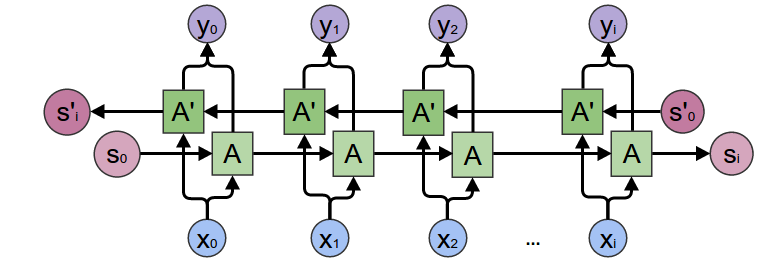

### Create, Compile and Fit Bidirectional LSTM Model



- Create a Sequential Model,

- Add Bidirectional layers,

- Apply Regularization (Drop Out),

- Compile the model.



***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*



*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.

Also use defined in Keras as ***accuracy*** as the metrics.*

In [56]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, RNN, Dropout

from tensorflow.keras.callbacks import EarlyStopping

In [57]:
X_train.shape

(1985, 20, 2)

In [58]:
y_train.shape

(1985,)

In [59]:
n_features = X_train.shape[2]

In [60]:
print(n_features)

2


In [61]:
model = Sequential()

model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))   #24 e 12 lik bir veri bekleyecek benden

model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mse')

In [62]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
X_train = X_train.astype('float32')

y_train = y_train.astype('float32')

In [65]:
X_test = X_train.astype('float32')

y_test = y_train.astype('float32')

In [66]:
model.fit(X_train, y_train, 

          epochs=30, 

          batch_size=32, 

          validation_split=0.3,

          callbacks=[early_stop])

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.5425 - val_loss: 0.1829
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3505 - val_loss: 0.1708
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3948 - val_loss: 0.1665
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4313 - val_loss: 0.1622
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3941 - val_loss: 0.1659
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3949 - val_loss: 0.1667
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3830 - val_loss: 0.1588
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3864 - val_loss: 0.1619
Epoch 9/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3445 - val_loss: 0.1597
Epoch 10/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3875 - val_loss: 0.1674
Epoch 11/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3984 - val_loss: 0.1612
Epoch 12/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3901 - val_l

<Axes: >

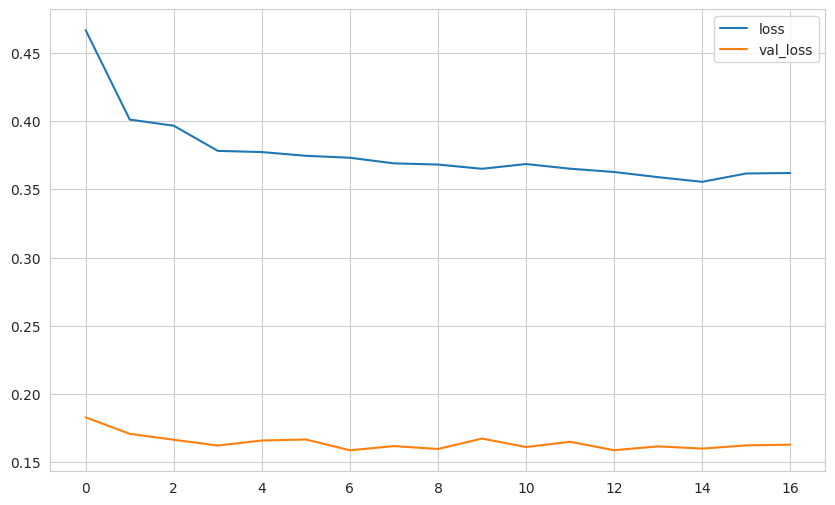

In [67]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot()

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



def eval_metrics(actual, pred):

    rmse = np.sqrt(mean_squared_error(actual, pred))

    mae = mean_absolute_error(actual, pred)

    mse = mean_squared_error(actual, pred)

    score = r2_score(actual, pred)

    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)



y_pred = model.predict(X_test)



eval_metrics(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
r2_score: 0.63732324898523 
mae: 0.38083318 
mse: 0.30503958 
rmse: 0.5523039


### LSTM

In [69]:
model = Sequential()

model.add(LSTM(units=128, input_shape=(time_steps, n_features)))   
model.add(Dropout(rate=0.2))

model.add(Dense(64, activation="relu"))

model.add(Dense(32, activation="relu"))

model.add(Dropout(rate=0.2))

model.add(Dense(16, activation="tanh"))

model.add(Dense(8, activation="relu"))

model.add(Dense(units=1))



model.compile(optimizer='adam', loss='mse')

In [70]:
model.fit(X_train, y_train, 

          epochs=50, 

          batch_size=32, 

          validation_split=0.3,

          callbacks=[early_stop])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.6839 - val_loss: 0.1801
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3954 - val_loss: 0.1726
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3964 - val_loss: 0.1624
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3958 - val_loss: 0.1639
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4307 - val_loss: 0.1656
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3857 - val_loss: 0.1538
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4351 - val_loss: 0.1555
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3604 - val_loss: 0.1558
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3632 - val_loss: 0.1517
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4431 - val_loss: 0.1503
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3961 - val_loss: 0.1529
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4026 - val_l

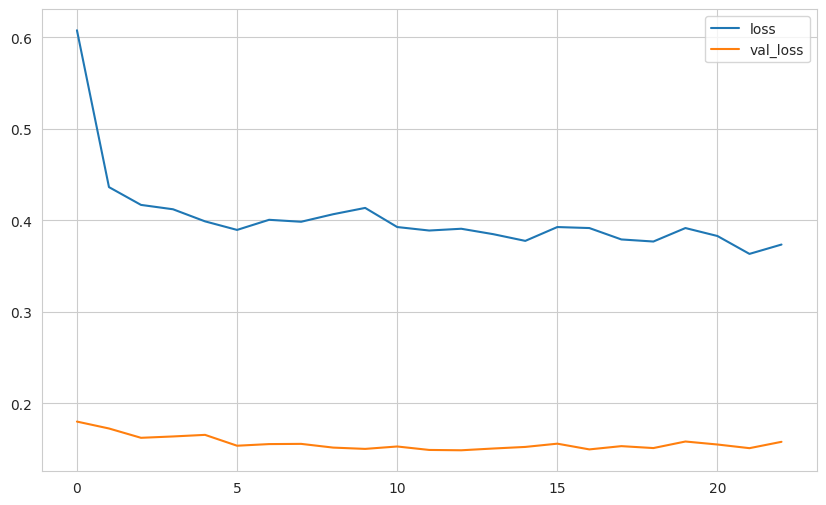

In [71]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot();

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



def eval_metrics(actual, pred):

    rmse = np.sqrt(mean_squared_error(actual, pred))

    mae = mean_absolute_error(actual, pred)

    mse = mean_squared_error(actual, pred)

    score = r2_score(actual, pred)

    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)



y_pred = model.predict(X_test)



eval_metrics(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
r2_score: 0.6378131649936869 
mae: 0.37601304 
mse: 0.30462754 
rmse: 0.5519307


### GRU

In [73]:
model = Sequential()

model.add(GRU(units=64, input_shape=(time_steps, n_features))) 
model.add(Dropout(rate=0.2))



model.add(Dense(32, activation="relu"))

model.add(Dropout(rate=0.1))

model.add(Dense(16, activation="tanh"))

model.add(Dense(8, activation="tanh"))

model.add(Dense(units=1))



model.compile(optimizer='adam', loss='mse')

In [74]:
model.fit(X_train, y_train, 

          epochs=30, 

          batch_size=32, 

          validation_split=0.3,

          callbacks=[early_stop])

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6649 - val_loss: 0.1625
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4280 - val_loss: 0.1583
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3989 - val_loss: 0.1503
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3382 - val_loss: 0.1587
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3958 - val_loss: 0.1519
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3926 - val_loss: 0.1578
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3609 - val_loss: 0.1519
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3974 - val_loss: 0.1482
Epoch 9/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3665 - val_loss: 0.1504
Epoch 10/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4220 - val_loss: 0.1503
Epoch 11/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4030 - val_loss: 0.1494
Epoch 12/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3500 - val_lo

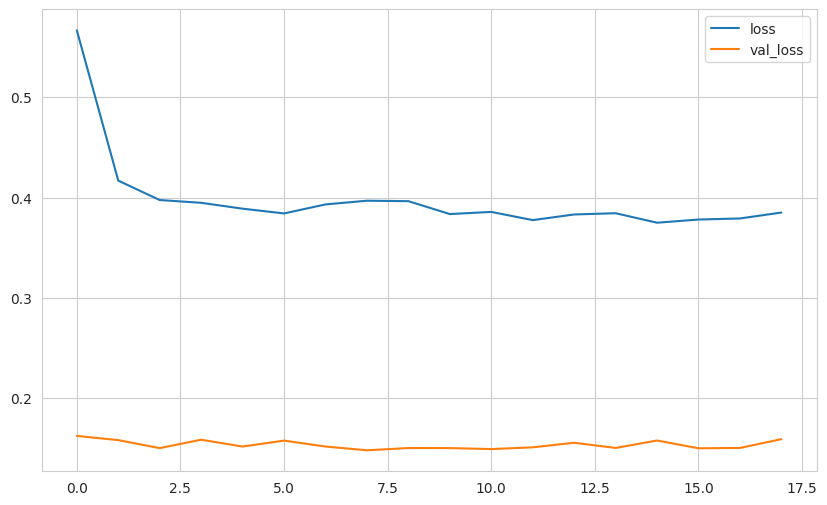

In [75]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot();

##  Evaluate on Test Data

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 



For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.



Check scores with both scaled results and inversed results



Plot predictions and actula values together

In [76]:
def eval_metrics(actual, pred):

    rmse = np.sqrt(mean_squared_error(actual, pred))

    mae = mean_absolute_error(actual, pred)

    mse = mean_squared_error(actual, pred)

    score = r2_score(actual, pred)

    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [77]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [78]:
eval_metrics(y_test, y_pred)

r2_score: 0.6318773015474772 
mae: 0.37433022 
mse: 0.30962008 
rmse: 0.55643517


### Inverse Transformation and Compare

In [79]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   # reshape ile tek satır haline getirmiş oluyoruz

y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))     # kaç sütun ise o kadar sütun olacak

y_pred_inv = target_transformer.inverse_transform(y_pred)

In [80]:
test_index = test.iloc[time_steps:].index



pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),

                       pd.DataFrame(y_pred_inv)], axis = 1)

pred_test.columns=['test','prediction']

#pred_test.index = test_index

In [81]:
pred_test

,test,prediction
0,0.788,1.212
1,2.035,1.183
2,1.349,1.473
3,0.345,1.629
4,0.380,1.368
...,...,...
1980,2.457,1.892
1981,2.457,1.973
1982,3.240,2.037
1983,3.240,2.176


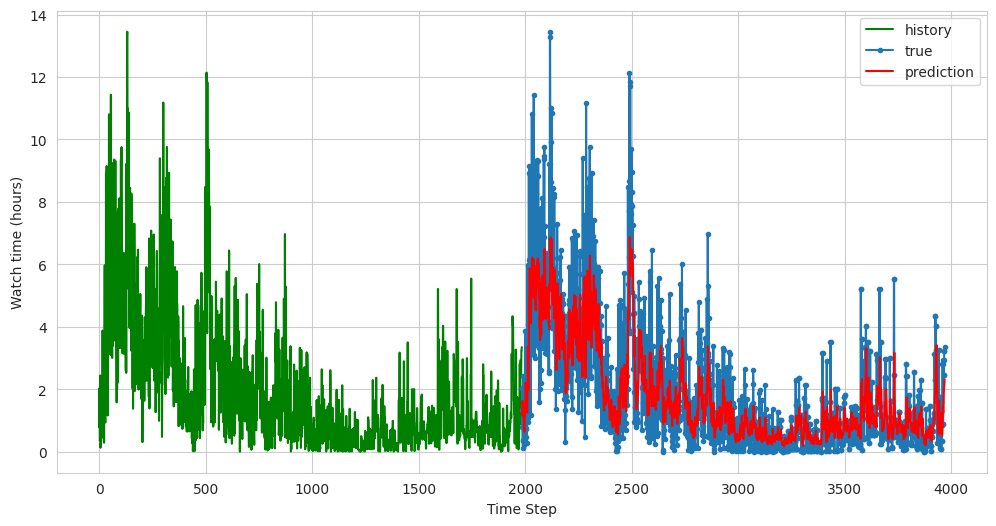

In [82]:
plt.figure(figsize=(12,6))

plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")

plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")

plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")

plt.ylabel('Watch time (hours)')

plt.xlabel('Time Step')

plt.legend()

plt.show();

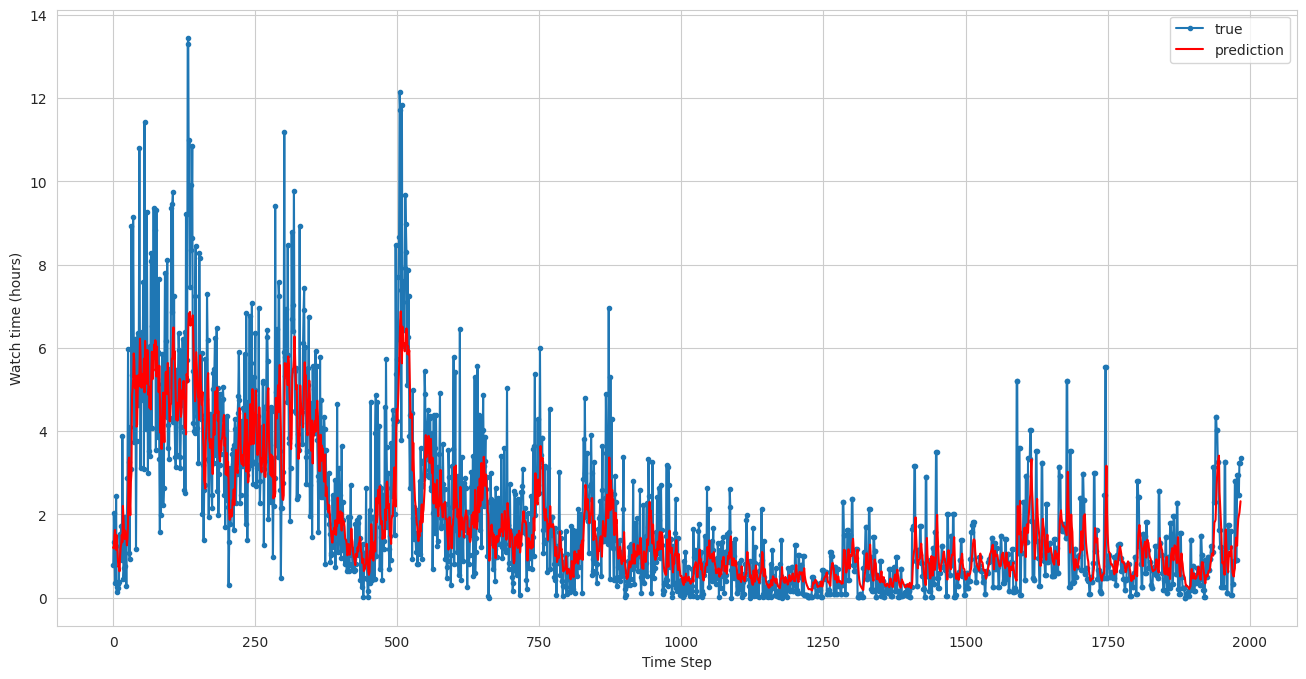

In [83]:
plt.figure(figsize=(16,8))

plt.plot(y_test_inv.flatten(), marker='.', label="true")

plt.plot(y_pred_inv.flatten(), 'r', label="prediction")

plt.ylabel('Watch time (hours)')

plt.xlabel('Time Step')

plt.legend()

plt.show();

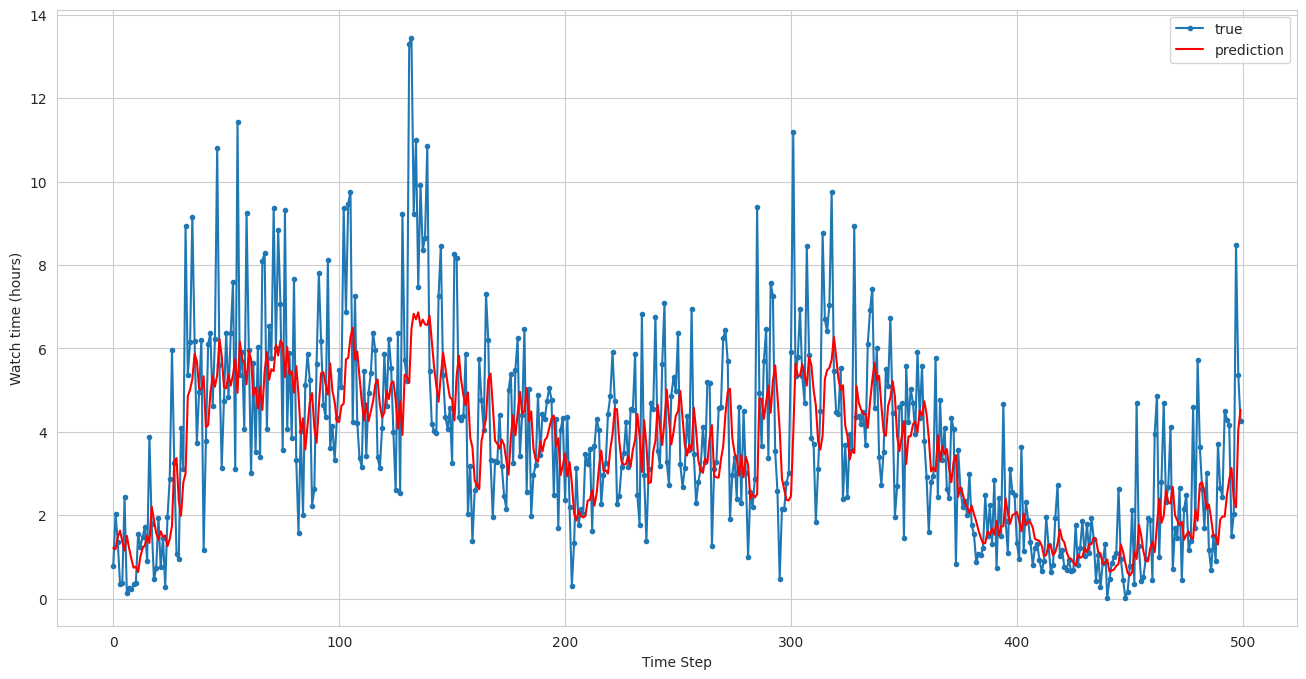

In [84]:
plt.figure(figsize=(16,8))

plt.plot(y_test_inv.flatten()[0:500], marker='.', label="true")

plt.plot(y_pred_inv.flatten()[0:500], 'r', label="prediction")

plt.ylabel('Watch time (hours)')

plt.xlabel('Time Step')

plt.legend()

plt.show();

## Retrain and Forecasting

### Scale full data

Let's devide dataset as "full" and "val". We can think about this "val" data as the weather forecast of next days.

In [85]:
val_size = 20

val = df.iloc[-val_size:]

full = df.iloc[:-val_size]

print(len(full), len(val))

2208 20


In [86]:
f_columns = ['Views']



f_transformer = RobustScaler()

target_transformer = RobustScaler()



full.loc[:, f_columns] = f_transformer.fit_transform(full[f_columns].to_numpy())

full['Watch time (hours)'] = target_transformer.fit_transform(full[['Watch time (hours)']])



val.loc[:, f_columns] = f_transformer.transform(val[f_columns])

val['Watch time (hours)'] = target_transformer.transform(val[['Watch time (hours)']])

In [87]:
full

,Watch time (hours),Views
Date,,
2020-02-18,-0.455,-0.289
2020-02-19,-0.551,-0.553
2020-02-21,-0.566,-0.579
2020-02-22,-0.468,-0.263
2020-02-23,-0.479,-0.316
...,...,...
2024-10-27,-0.030,-0.316
2024-10-28,0.914,0.842
2024-10-28,0.914,0.842


### reshape to [samples, time_steps, n_features]

In [88]:
X, y = create_dataset(full, full["Watch time (hours)"], time_steps)



print(X.shape, y.shape)

(2188, 20, 2) (2188,)


### Create Final model with full data 

In [89]:
X = X.astype('float32')

y = y.astype('float32')

In [90]:
model = Sequential()

model.add(GRU(units=64, input_shape=(time_steps, n_features)))  
model.add(Dropout(rate=0.2))



model.add(Dense(32, activation="relu"))

model.add(Dropout(rate=0.1))

model.add(Dense(16, activation="tanh"))

model.add(Dense(8, activation="tanh"))

model.add(Dense(units=1))



model.compile(optimizer='adam', loss='mse')

In [91]:
model.fit(X, y, 

          epochs=20, 

          batch_size=32        

         )

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5146
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3567
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3206
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3217
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3403
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3420
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3472
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3343
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3192
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3353
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3214
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3037
Epoch 13/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3432
Epoch 14/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3011
Epoch 15/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3187
Epoch 16/20
69/69 ━

<Axes: >

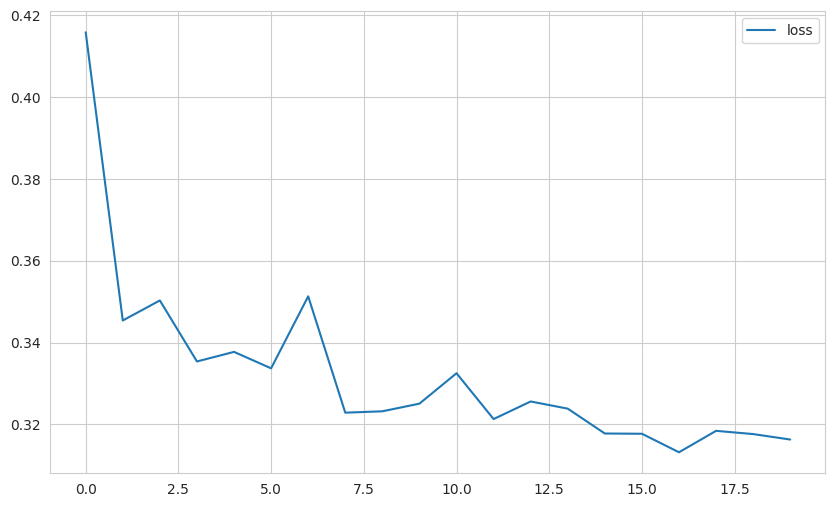

In [92]:
loss_df = pd.DataFrame(model.history.history)

loss_df.plot()

### forecasting

In [93]:
df_fake = val.iloc[:,1:]

df_fake

,Views
Date,
2024-10-30,1.211
2024-10-30,1.211
2024-10-31,0.132
2024-10-31,0.132
2024-11-01,1.237
2024-11-01,1.237
2024-11-02,0.263
2024-11-03,0.079
2024-11-04,0.474


In [94]:
reel = np.array(val.iloc[:,:1])

reel.reshape((1,-1))[0]

array([1.65897484, 1.65897484, 0.51430031, 0.51430031, 1.24384808,
       1.24384808, 1.06866933, 0.32519268, 0.86293992, 1.25067323,
       1.05850125, 0.63664221, 0.38327607, 0.83791438, 1.10873804,
       0.35685765, 0.34538954, 0.70164361, 0.78781688, 1.0887269 ])

In [95]:
forecast = []

# Replace periods with whatever forecast length you want

periods = 20



first_eval_batch = full.values[-time_steps:]

current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))

current_batch = current_batch.astype('float32')



features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))



for i in range(periods):

    

    # get prediction 1 time stamp ahead 

    current_pred = model.predict(current_batch)[0][0]

    

    # store prediction

    forecast.append(current_pred) 

    new = features[i][0].tolist()

    new.insert(0,reel[i][0])

    new = np.array(new).reshape(1,1,full.shape[1])

    

    # update batch to now include prediction and drop first value

    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [96]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: -0.11271166528185028 
mae: 0.3451066787492068 
mse: 0.18148922491080627 
rmse: 0.42601552191300057


In [97]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))

forecast

array([[2.8575213, 3.7223313, 3.9444063, 2.8099403, 2.797081 , 3.5422792,
        3.6415844, 3.4789927, 2.506481 , 3.1507452, 3.44514  , 3.3663445,
        3.0292804, 2.7693355, 3.0092585, 3.2316778, 2.5335445, 2.664916 ,
        2.9290752, 2.8335419]], dtype=float32)

In [98]:
forecast_index = pd.date_range(start = '2024-11-17 00:00:00', periods = periods, freq = 'H')

In [99]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

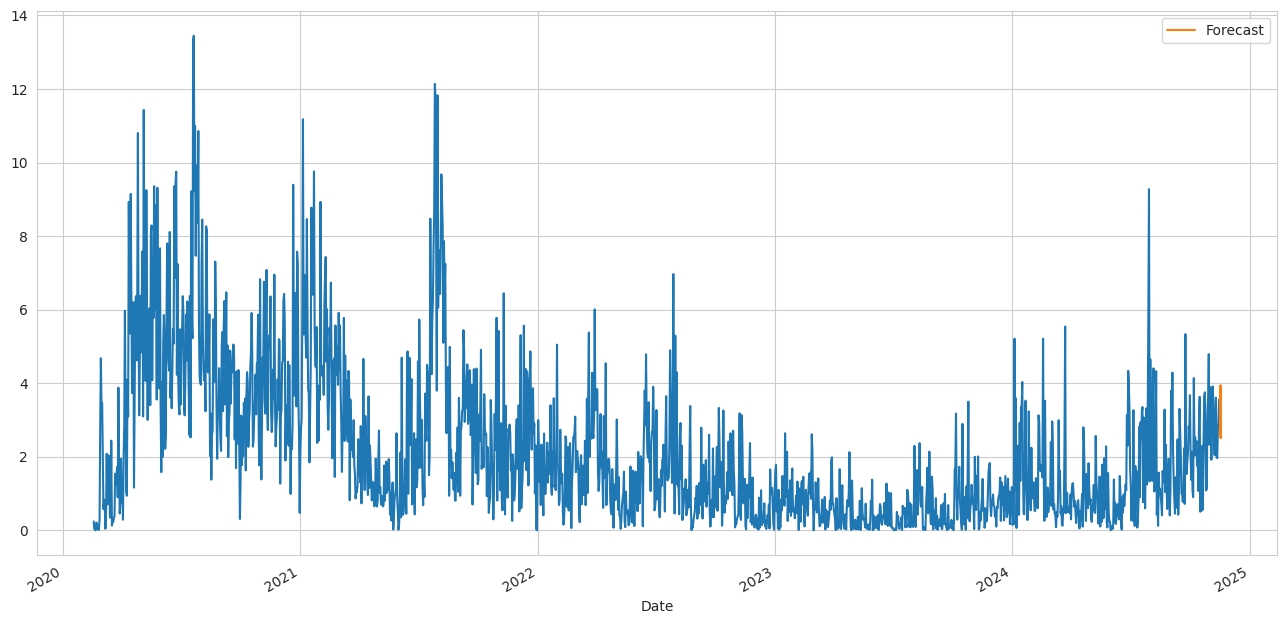

In [100]:
ax = df["Watch time (hours)"].plot()

forecast_df.plot(ax = ax, figsize = (16, 8));

(20044.0, 20045.958333333332)

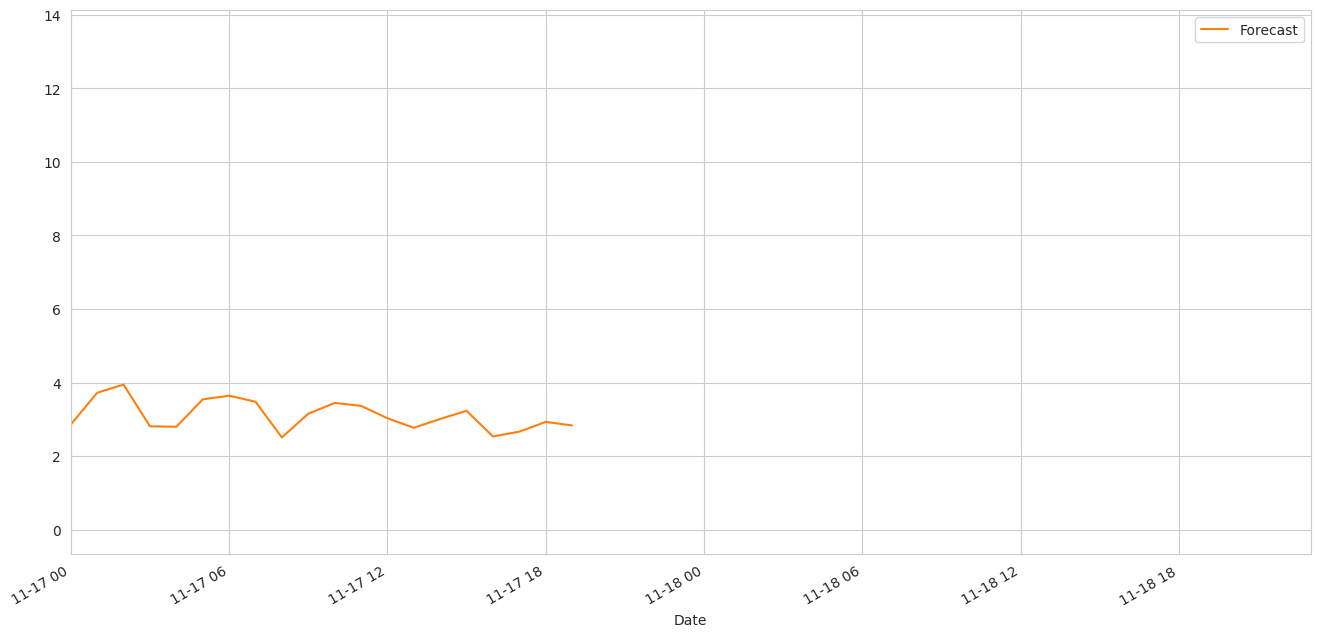

In [101]:
ax = df["Watch time (hours)"].plot()

forecast_df.plot(ax = ax, figsize = (16, 8))

plt.xlim('2024-11-17 00:00:00', '2024-11-18 23:00:00')

# Machine Learning Models

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [103]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import math
from math import sqrt

In [104]:
data = pd.read_csv("/kaggle/input/my-youtube-data/my_data.csv")

# veri setinin ilk beş elemanı: 
data.head()

,Date,Views,Watch time (hours)
0,2021-01-01,34.000,2.152
1,2020-12-31,13.000,0.475
2,2020-12-30,47.000,2.580
3,2020-12-29,78.000,3.535
4,2020-12-28,158.000,7.245


In [105]:
data = data.sort_values(by='Date', ascending=True)

In [106]:
data.shape

(2228, 3)

In [107]:
data.drop("Views",axis=1,  inplace=True)

In [108]:
data.head()

,Date,Watch time (hours)
316,2020-02-18,0.240
315,2020-02-19,0.033
314,2020-02-21,0.000
313,2020-02-22,0.211
312,2020-02-23,0.186


In [109]:
data.tail()

,Date,Watch time (hours)
1912,2024-11-11,1.988
1911,2024-11-12,1.963
1910,2024-11-13,2.730
1909,2024-11-14,2.916
1908,2024-11-15,3.564


## ACF ve PACF Grafikler

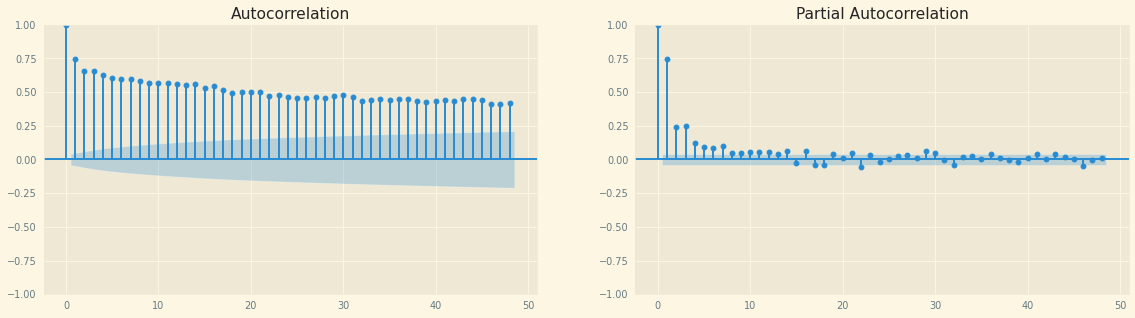

In [110]:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5), dpi= 70)

plot_acf(data["Watch time (hours)"].tolist(), ax=ax1, lags=48)
plot_pacf(data["Watch time (hours)"].tolist(), ax=ax2, lags=48, method="ywm")

plt.show()

In [111]:
# Set 'Date' as the index
data = data.set_index('Date')
data.head()

,Watch time (hours)
Date,
2020-02-18,0.240
2020-02-19,0.033
2020-02-21,0.000
2020-02-22,0.211
2020-02-23,0.186


In [112]:
train_data = data[:'2024-10-14']
test_data = data['2024-10-15':'2024-11-15']
pred_df = test_data.copy()

## ARIMA

<Axes: xlabel='Date'>

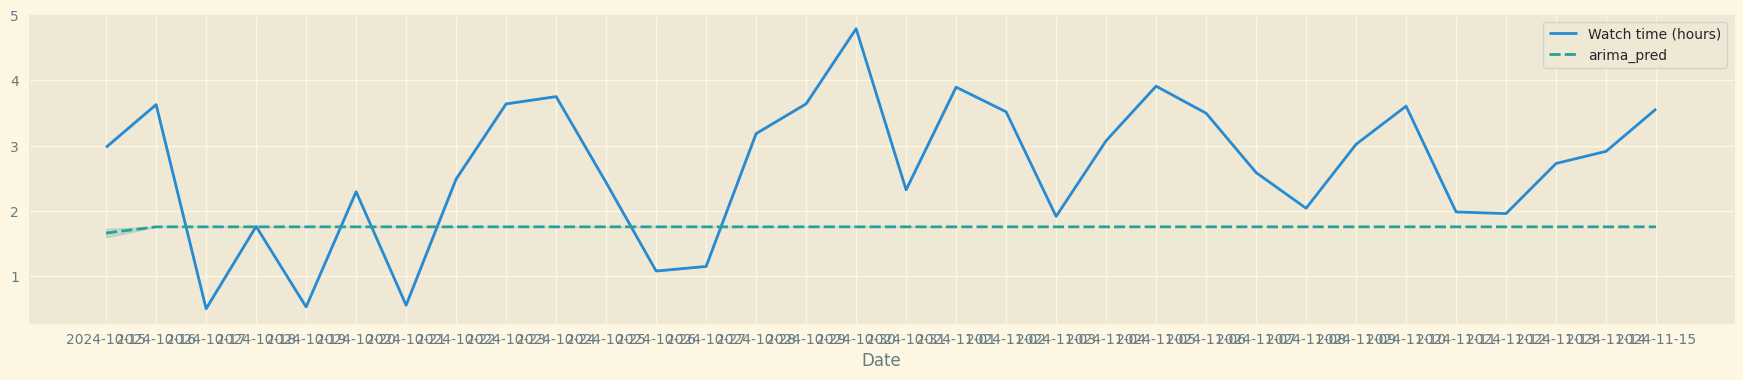

In [113]:

arima_model = sm.tsa.arima.ARIMA(np.asarray(train_data),order=(2,1,2))
arima_model_fit = arima_model.fit()
arima_pred = arima_model_fit.forecast(len(test_data),disp=False)

pred_df["arima_pred"] = arima_pred.round(2)
plt.figure(figsize=(22,4))
sns.lineplot(data = pred_df[['Watch time (hours)', 'arima_pred']])

## SARIMA

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78925D+00    |proj g|=  2.03001D-01


 This problem is unconstrained.



At iterate    5    f=  1.64578D+00    |proj g|=  9.91585D-02

At iterate   10    f=  1.62728D+00    |proj g|=  3.93730D-02

At iterate   15    f=  1.61590D+00    |proj g|=  8.04287D-03

At iterate   20    f=  1.61537D+00    |proj g|=  5.06710D-03

At iterate   25    f=  1.61530D+00    |proj g|=  7.78988D-03

At iterate   30    f=  1.61440D+00    |proj g|=  7.31044D-03

At iterate   35    f=  1.61365D+00    |proj g|=  6.92015D-03

At iterate   40    f=  1.61335D+00    |proj g|=  2.27166D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     60      1     0     0   2.272D-03   1.613D+00
  F =   1.61334556130


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<Axes: xlabel='Date'>

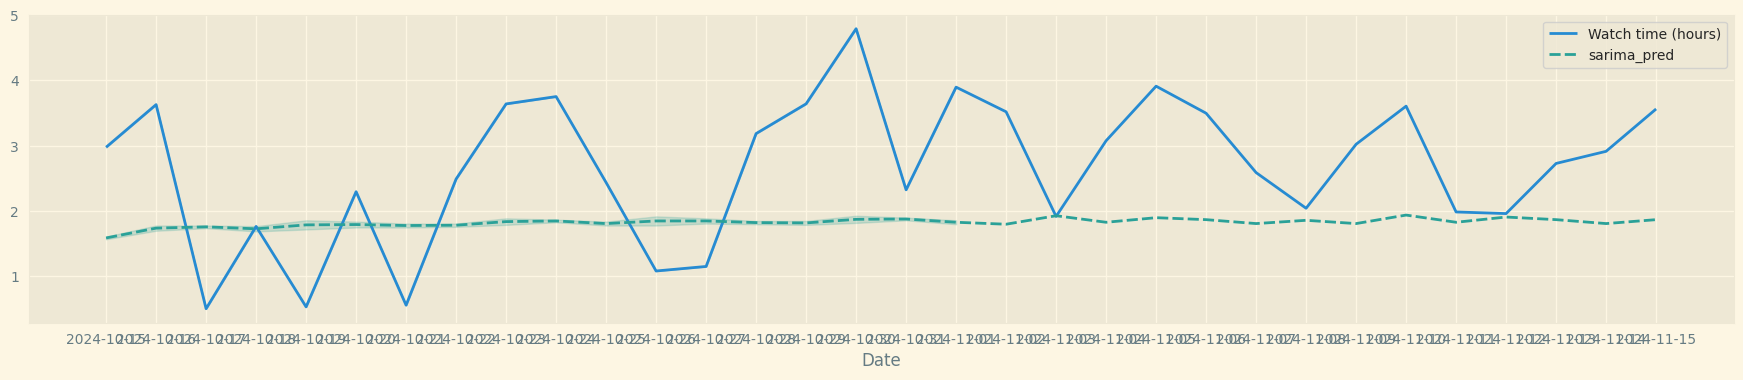

In [114]:
sarima_model = SARIMAX(np.asarray(train_data), order=(2, 1, 2), seasonal_order=(1,1,1,7))
sarima_model_fit = sarima_model.fit()
sarima_pred = sarima_model_fit.forecast(len(test_data))

pred_df["sarima_pred"] = sarima_pred.round(2)
plt.figure(figsize=(22,4))
sns.lineplot(data = pred_df[['Watch time (hours)', 'sarima_pred']])

## PROPHET

10:23:52 - cmdstanpy - INFO - Chain [1] start processing
10:23:53 - cmdstanpy - INFO - Chain [1] done processing


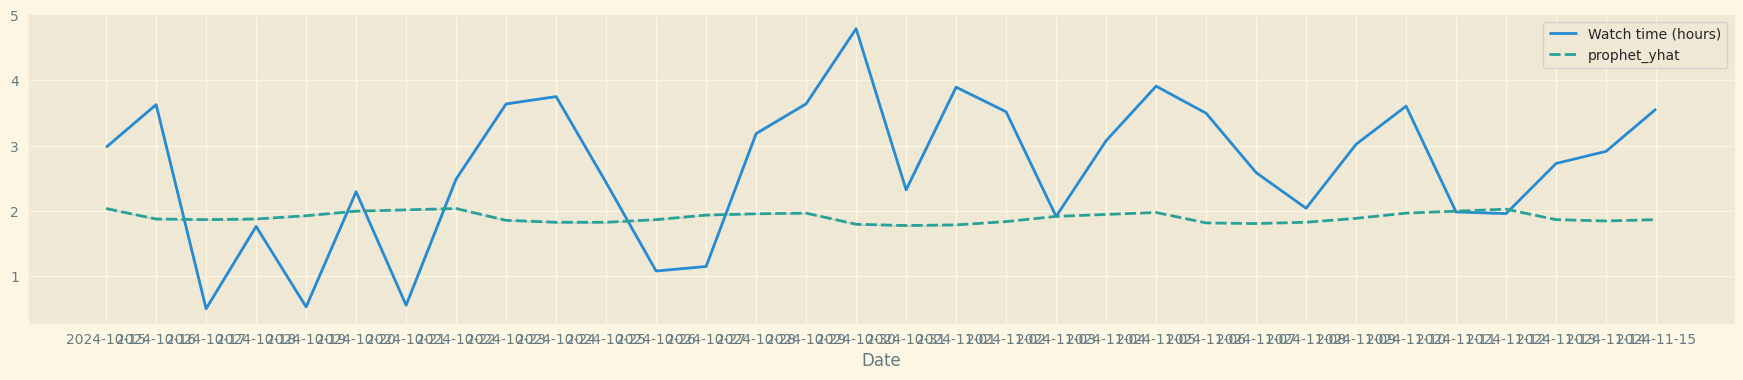

In [115]:
prophet_df = data.reset_index()
prophet_df.columns = ["ds","y"]

train_data_prophet = prophet_df[prophet_df['ds'] < '2024-10-14']
test_data_prophet = prophet_df[(prophet_df['ds'] >= '2024-10-15') & (prophet_df['ds'] <= '2024-11-15')]

prophet_model = Prophet()
prophet_model.fit(train_data_prophet)
model_predict = prophet_model.predict(test_data_prophet)

pred_df["prophet_yhat"] = model_predict["yhat"].values.round(2)
pred_df["prophet_yhat_lower"] = model_predict["yhat_lower"].values.round(2)
pred_df["prophet_yhat_upper"] = model_predict["yhat_upper"].values.round(2)

plt.figure(figsize=(22,4))
sns.lineplot(data = pred_df[['Watch time (hours)', 'prophet_yhat']]);

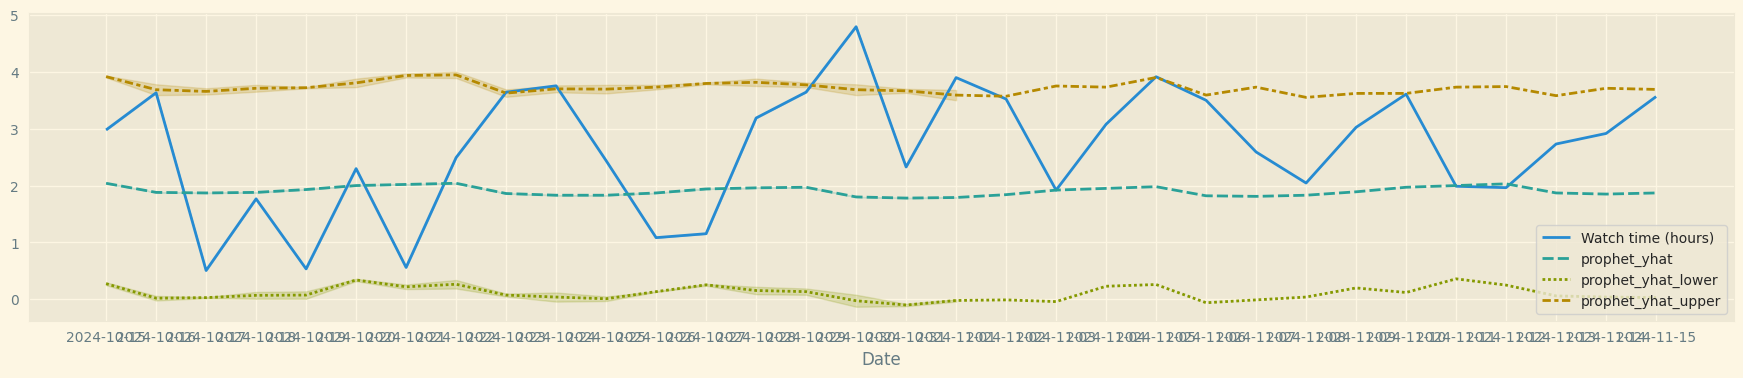

In [116]:
plt.figure(figsize=(22,4))
sns.lineplot(data = pred_df[['Watch time (hours)', 'prophet_yhat', 'prophet_yhat_lower','prophet_yhat_upper']]);

## EVALUATION

In [117]:
prophet_mape = mean_absolute_percentage_error(pred_df["Watch time (hours)"].values, pred_df["prophet_yhat"].values)
prophet_r = r2_score(pred_df["Watch time (hours)"].values, pred_df["prophet_yhat"].values)
prophet_rmse = math.sqrt(mean_squared_error(pred_df["Watch time (hours)"].values, pred_df["prophet_yhat"].values))

arima_mape = mean_absolute_percentage_error(pred_df["Watch time (hours)"].values, pred_df["arima_pred"].values)
arima_r = r2_score(pred_df["Watch time (hours)"].values, pred_df["arima_pred"].values)
arima_rmse = math.sqrt(mean_squared_error(pred_df["Watch time (hours)"].values, pred_df["arima_pred"].values))

sarima_mape = mean_absolute_percentage_error(pred_df["Watch time (hours)"].values, pred_df["sarima_pred"].values)
sarima_r = r2_score(pred_df["Watch time (hours)"].values, pred_df["sarima_pred"].values)
sarima_rmse = math.sqrt(mean_squared_error(pred_df["Watch time (hours)"].values, pred_df["sarima_pred"].values))

results = {'Prophet': [prophet_mape,prophet_rmse,prophet_r], 
        'ARIMA': [arima_mape,arima_rmse,arima_r],
        'SARIMA': [sarima_mape,sarima_rmse,sarima_r]}
results = pd.DataFrame(results,index=['MAE','RMSE','R2'])
results

,Prophet,ARIMA,SARIMA
MAE,0.644,0.629,0.621
RMSE,1.366,1.428,1.384
R2,-0.400,-0.530,-0.437
